======================== Import Packages ==========================

In [13]:
import os,sys,pdb
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, join, MaskedColumn
from astropy import constants as const
import csv
import matplotlib as mpl
from astropy import constants as const
from astroquery.vizier import Vizier
import warnings
from astropy.logger import AstropyWarning
warnings.filterwarnings('ignore', category=AstropyWarning)

===================== Define Functions ===================

In [14]:
def get_data(catalog, join_key='Name', join_type='inner'):

    """
    PURPOSE:    Get data from literature with Vizier

    INPUT:      catalog = ctalog name on Vizier (str)
                join_key = column header to join tables, if multiple (str; optional)
                join_type = way to join tables, if multiple (str; optional)

    OUTPUT:     t = data table (AstroPy Table)

    """

    ### GET FULL CATALOG (ALL COLUMNS, ALL ROWS)
    viz = Vizier(catalog=catalog, columns=['**'])
    viz.ROW_LIMIT = -1
    tv = viz.get_catalogs(catalog)

    ### IF MULTIPLE TABLES, JOIN THEN
    for i, val in enumerate(tv.keys()):
        if i == 0:
            t = tv[val]
        else:
            tt = tv[val]
            if join_key in tt.columns:
                t = join(t, tt, join_type=join_type, keys=join_key)

    return t

============================= Code ==================================

In [15]:
#### LOAD IN LUPUS DATA
T = get_data("J/ApJ/828/46")

In [16]:
### ONLY KEEP DUST DETECTIONS, CHANGE UNITS TO SOLAR MASSES, AND SORT TABLE BY INCREASING DUST MASS
T = T[T['F890']/T['e_F890'] > 3.0]
T['MDust'] = T['MDust']*(const.M_earth.cgs/const.M_sun.cgs).value
T['e_MDust']  = np.sqrt( (T['e_MDust'])**2 + (0.1*T['e_MDust'])**2 )*(const.M_earth.cgs/const.M_sun.cgs).value
T.sort('MDust')

In [17]:
### CHANGE GAS MASS UNITS TO SOLAR MASSES
T['Mgas'] = T['Mgas'] * (const.M_jup.cgs/const.M_sun.cgs).value
T['b_Mgas'] = T['b_Mgas'] * (const.M_jup.cgs/const.M_sun.cgs).value
T['B_Mgas'] = T['B_Mgas'] * (const.M_jup.cgs/const.M_sun.cgs).value

In [18]:
### SETUP PLOT
mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15)
mpl.rc('xtick.major',size=7, pad=7, width=1)
mpl.rc('ytick.major',size=7, pad=7, width=1)
mpl.rc('axes', linewidth=1)
mpl.rc('lines', markersize=5)
fig = plt.figure(figsize = (16, 12))

<Figure size 1600x1200 with 0 Axes>

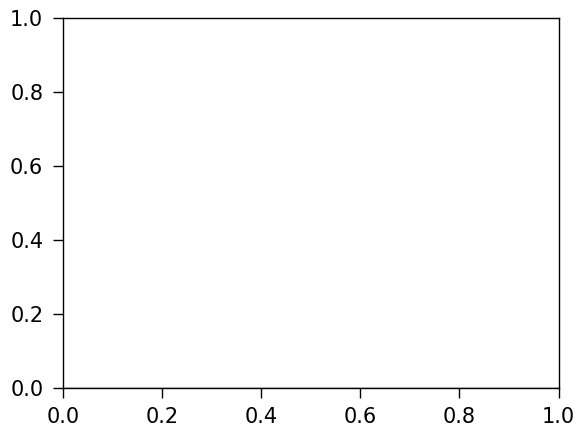

In [19]:
### SET UP DUST MASS SUBPLOT
ax1 = fig.add_subplot(311)
ax1.set_ylim(1e-7, 1e-3)
ax1.set_yscale('log')
ax1.set_ylabel('Dust Mass ('+r'$\mathregular{M_{\odot}}$'+')', fontsize=17)
ax1.set_xlim(-1, len(T))
ax1.xaxis.set_ticks(np.arange(-4, len(T),1))
fig.canvas.draw()
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax1.tick_params(axis='y', which='both', labelsize=12)
ax1.grid(color='gray',linewidth=1, linestyle=':', alpha=0.3)
plt.axhline(y=3e-06,color='gray',linewidth=1.0)
ax1.text(-3.5,4e-06,r'$\mathregular{1M_{\oplus}}$',fontsize=12,style='italic',color='gray')
plt.axhline(y=3e-05,color='gray',linewidth=1.0)
ax1.text(-3.5,4e-05,r'$\mathregular{10M_{\oplus}}$',fontsize=12,style='italic',color='gray')
ax1.errorbar(-1, 5.68e-05, fmt='*', color='white', ms=12, mec='black', mew=1, zorder=999)
ax1.errorbar(-2, 1.20e-05, fmt='*', color='white', ms=12, mec='black', mew=1, zorder=999)
ax1.errorbar(-3, 2.26e-07, fmt='*', color='white', ms=12, mec='black', mew=1, zorder=999)
ax1.arrow(-3, 2.26e-07, 0.0, -0.4*2.26e-07, head_width=0.3, head_length=2.26e-07*0.1, fc='black', ec='black', linewidth=1, zorder=1)

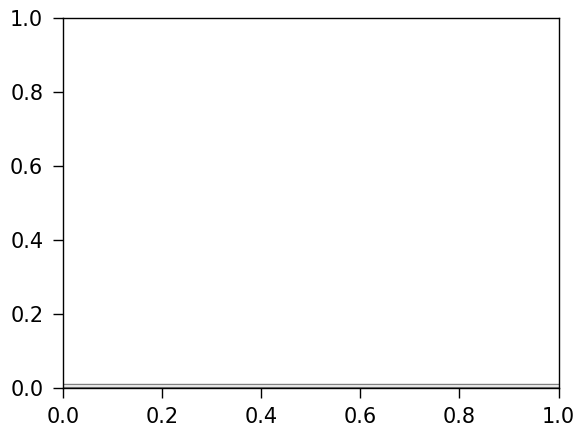

In [20]:
### SET UP GAS MASS SUBPLOT
ax2 = fig.add_subplot(312)
ax2.set_ylim(1e-5, 1e-1)
ax2.set_yscale('log')
ax2.set_ylabel('Gas Mass ('+r'$\mathregular{M_{\odot}}$'+')', fontsize=17)
ax2.set_xlim(-1,len(T))
ax2.xaxis.set_ticks(np.arange(-4, len(T), 1))
ax2.tick_params(axis='y', which='both', labelsize=12)
fig.canvas.draw()
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.grid(color='gray', linewidth=1, linestyle=':', alpha=0.3)
plt.axhline(y=1e-3, color='gray', linewidth=1.0)
plt.axhline(y=1e-2, color='gray', linewidth=1.0)
ax2.text(-3.5, 1.4e-3, r'$\mathregular{1M_{Jup}}$', fontsize=12, style='italic', color='gray')
ax2.text(-3.5, 1.2e-2,r'$\mathregular{MMSN}$', fontsize=12, style='italic', color='gray')
ax2.errorbar(-1, 3.8e-4, fmt='*', color='white', ms=12, mec='black', mew=1, zorder=999)
ax2.errorbar(-2, 1.9e-4, fmt='*', color='white', ms=12, mec='black', mew=1, zorder=999)
ax2.arrow(-2, 1.9e-4, 0.0, -0.5 * 1.9e-4, head_width=0.3, head_length=1.9e-4 * 0.1, fc='black', ec='black', linewidth=1, zorder=1)

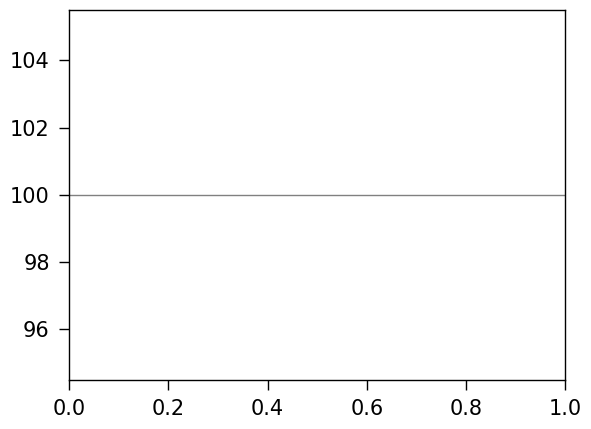

In [21]:
### SET UP GAS-TO-DUST MASS SUBPLOT
ax3 = fig.add_subplot(313)
ax3.set_ylim(0.1, 1e4)
ax3.set_yscale('log')
ax3.set_ylabel('Gas-to-Dust Ratio', fontsize=17) 
ax3.set_xlim(-1,len(T))
ax3.xaxis.set_ticks(np.arange(-4, len(T), 1))
ax3.tick_params(axis='y', which='both', labelsize=12)
fig.canvas.draw()
labels = list(np.append([' ', 'Continuum non-det', r'$\mathregular{^{13}\!\hspace{0.1}CO}$' + ' & ' + r'$\mathregular{C^{18}\!\hspace{0.1}O}$' + 
                         ' non-det', r'$\mathregular{C^{18}\!\hspace{0.1}O}$' + ' non-det'], np.array(T['Name'])))
ax3.set_xticklabels(labels, rotation='vertical', size=9)
ax3.grid(color='gray',linewidth=1, linestyle=':', alpha=0.3)
plt.axhline(y=100, color='gray', linewidth=1.0)
ax3.text(-3.5, 1.3e2, 'ISM', fontsize=11, style='italic', color='gray')
ax3.errorbar(-1, 7, fmt='*', color='white', ms=12, mec='black', mew=1, zorder=999)
ax3.errorbar(-2, 13,fmt='*', color='white', ms=12, mec='black', mew=1, zorder=999)
ax3.arrow(-2, 13, 0.0, -0.5 * 13, head_width=0.3, head_length=13 * 0.1, fc='black', ec='black', linewidth=1, zorder=1)

In [22]:
### PLOT DUST MASSES
ax1.errorbar(np.arange(len(T)), T['MDust'], yerr=T['e_MDust'], 
             fmt='o', mfc='lightblue', ms=6, mec='black', mew=0.8, ecolor='black', elinewidth=1, zorder=999,capsize=2)

<ErrorbarContainer object of 3 artists>

In [23]:
### PLOT GAS MASSES AND GAS-TO-DUST RATIOS
for i, val in enumerate(T['Name']):

    ### PLOT NON-DETECTIONS
    if T['l_Mgas'][i] == '<':

        ax2.errorbar(i, T['Mgas'][i], fmt='v', color='lightgray', ms=7, mec='black', mew=0.9, zorder=999)
        ax3.errorbar(i, int(round(T['Mgas'][i]/T['MDust'][i])), fmt='v', color='lightgray', ms=7, mec='black', mew=0.9, zorder=999)

    ### PLOT DETECTIONS WITH ONLY UPPER LIMITS
    elif T['b_Mgas'][i] is np.ma.masked:

        ax2.arrow(i, T['Mgas'][i], 0.0, -0.5 * T['Mgas'][i], head_width=0.3, head_length=T['Mgas'][i] * 0.1,
                 fc='black', ec='black', linewidth=0.9, zorder=1)
        ax2.errorbar(i, T['Mgas'][i], yerr=[[0],[T['B_Mgas'][i] - T['Mgas'][i]]],
                    fmt='o', mfc='lightblue', ms=7, mec='black', mew=1, ecolor='black', elinewidth=0.9, zorder=999, capsize=3)

        g2d = int(round(T['Mgas'][i]/T['MDust'][i]))
        g2d_max = int(round(T['B_Mgas'][i]/T['MDust'][i]))
        ax3.arrow(i, g2d, 0.0, -0.5 * g2d, head_width=0.3, head_length=g2d * 0.1, fc='black', ec='black', linewidth=1, zorder=1)
        ax3.errorbar(i, g2d,yerr=[[0],[g2d_max - g2d]], fmt='o', mfc='lightblue', ms=7, mec='black', mew=1, 
                     ecolor='black', elinewidth=1, zorder=999, capsize=3)

    ### PLOT DETECTIONS WITH BOTH UPPER AND LOWER LIMITS
    else:
        
        ax2.errorbar(i, T['Mgas'][i], yerr=[[T['Mgas'][i] - T['b_Mgas'][i]], [T['B_Mgas'][i] - T['Mgas'][i]]],
                    fmt='o', mfc='lightblue', ms=6, mec='black', mew=1, ecolor='black', elinewidth=0.9, zorder=999, capsize=3)
        
        g2d = int(round(T['Mgas'][i]/T['MDust'][i]))
        g2d_max = int(round(T['B_Mgas'][i]/T['MDust'][i]))
        g2d_min = int(round(T['b_Mgas'][i]/T['MDust'][i]))
        ax3.errorbar(i, g2d, yerr=[[g2d - g2d_min],[g2d_max - g2d]], fmt='o', mfc='lightblue', 
                     ms=6, mec='black', mew=0.9, ecolor='black', elinewidth=1, zorder=999, capsize=3)

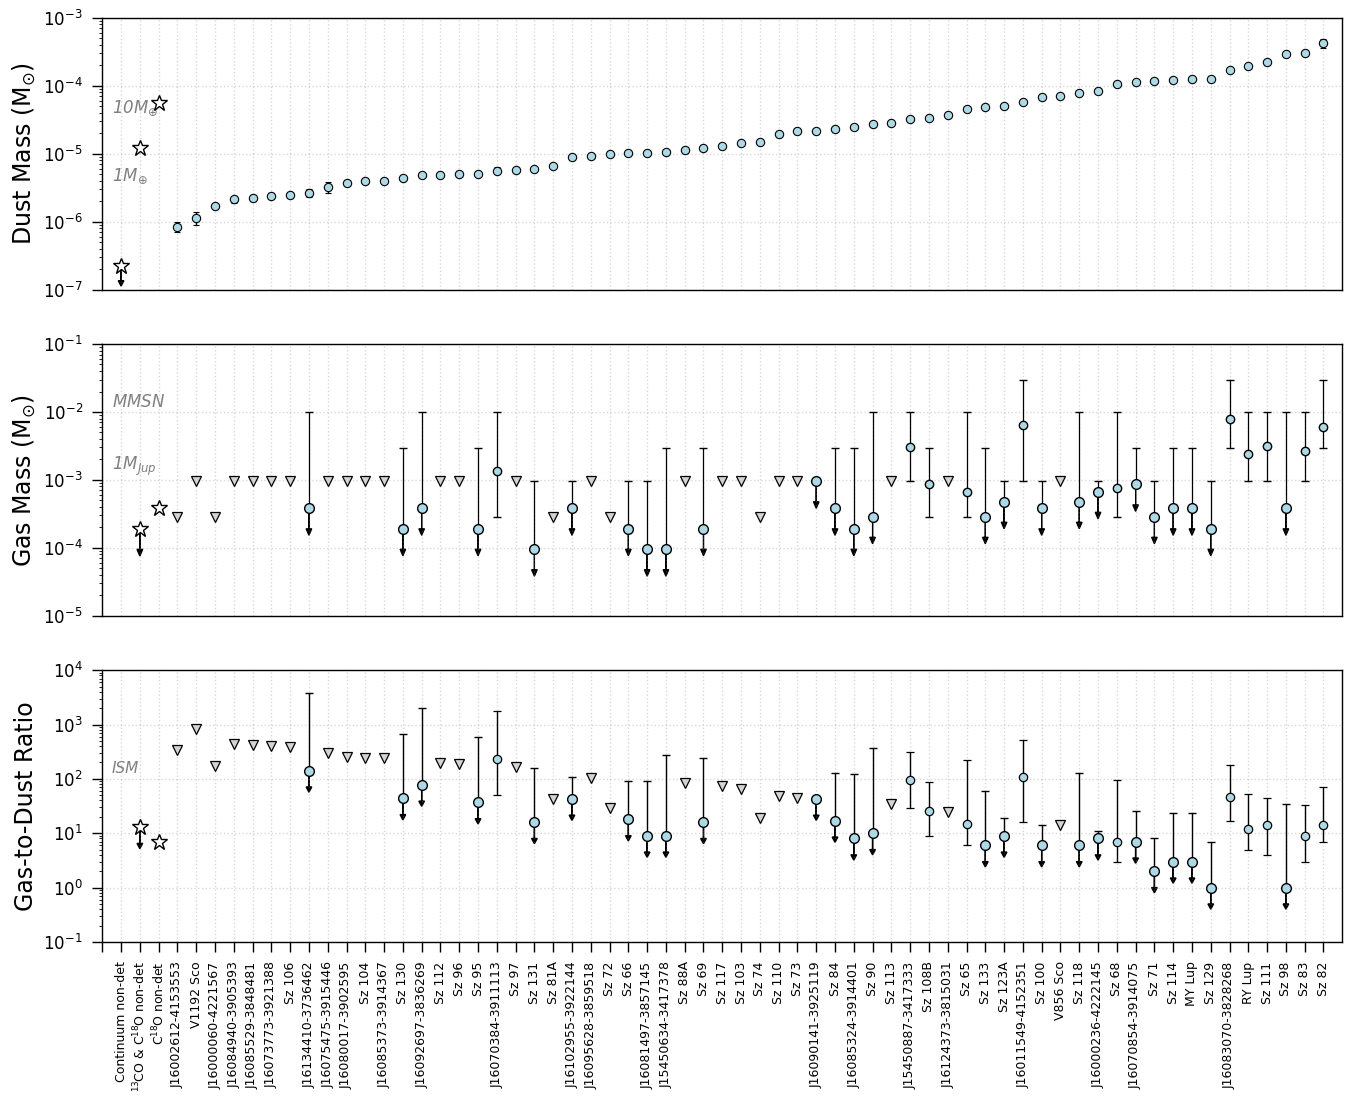

In [24]:
### SAVE PLOT
fig.savefig('../output/figure_03.png', bbox_inches='tight', dpi=100)
fig

In [25]:
plt.close('all')